<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

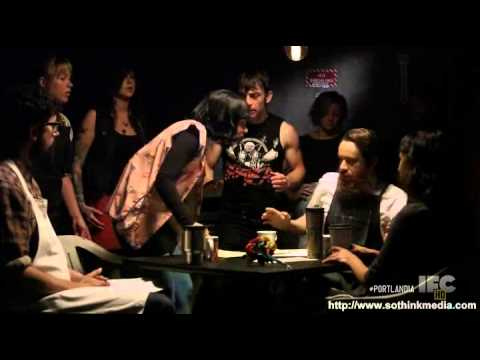

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\iambr\\OneDrive\\Desktop\\Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [299]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [339]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [300]:
# add date column as date only
shops["date"]=shops["full_review_text"]
date = lambda x: x["date"].strip().split(" ")[0].strip()
shops["date"] = shops.apply(date, axis=1)

# change star_rating to single integer
star = lambda x: int(str(x["star_rating"]).split(" ")[1].split(".")[0])
shops["star_rating"] = shops.apply(star, axis=1)

# remove date from review text
review = lambda x: " ".join(x["full_review_text"].strip().split(" ")[1:])
shops["full_review_text"] = shops.apply(review, axis=1)

shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [314]:
shops['tokens'] = shops['tokens'].apply(tokenize)
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [326]:
from tqdm import tqdm
tqdm.pandas()
ps = PorterStemmer()

In [327]:
#stem tokens
shops['stems'] = shops.tokens.progress_apply(lambda x: [ps.stem(word) for word in x])
shops.head(1)


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 7616/7616 [00:11<00:00, 651.69it/s]


,coffee_shop_name,full_review_text,star_rating,date,tokens,stems
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,..."


In [329]:
wc = count(shops['stems'])
print(wc.shape)
wc.head()

(15174, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
36,the,6847,34809,1.0,0.044975,0.044975,0.899028
49,and,6864,26650,2.0,0.034433,0.079408,0.901261
26,a,6246,22755,3.0,0.029401,0.108809,0.820116
3,i,5528,20237,4.0,0.026147,0.134957,0.725840
69,to,5653,17167,5.0,0.022181,0.157137,0.742253


In [320]:
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [332]:
nlp = spacy.load("en_core_web_lg")
shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)
shops['lemmas'].head()



  0%|                                                                                                            | 0/7616 [00:00<?, ?it/s]

  0%|                                                                                                    | 4/7616 [00:00<03:42, 34.16it/s]

  0%|                                                                                                    | 8/7616 [00:00<03:55, 32.27it/s]

  0%|▏                                                                                                  | 10/7616 [00:00<05:15, 24.11it/s]

  0%|▏                                                                                                  | 12/7616 [00:00<05:36, 22.63it/s]

  0%|▏                                                                                                  | 16/7616 [00:00<04:53, 25.92it/s]

  0%|▏                                                                                                  | 19/7616 [00:00<04:44, 26.73it/s]

  0%|▎            

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

In [333]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, check, locate, Northcross, mall, shopping,..."


In [340]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [318]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [344]:
# Tokens- Word Counts
wcTokens = count(shops['tokens'])
print(wcTokens.shape)
wcTokens.head()

(20530, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,the,6847,34809,1.0,0.044975,0.044975,0.899028
54,and,6864,26650,2.0,0.034433,0.079408,0.901261
29,a,6246,22755,3.0,0.029401,0.108809,0.820116
4,i,5528,20237,4.0,0.026147,0.134957,0.725840
72,to,5653,17164,5.0,0.022177,0.157133,0.742253


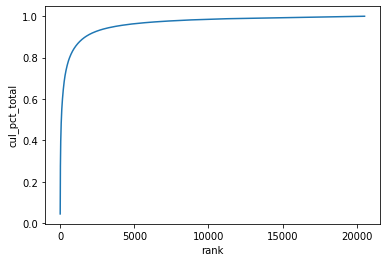

In [345]:
# Tokens- Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wcTokens);

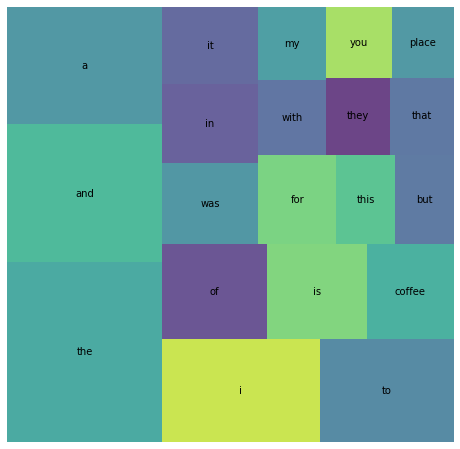

In [346]:
wcTokens_top20 = wcTokens[wcTokens['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcTokens_top20['pct_total'], label=wcTokens_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [348]:
# Lemmas- Word Counts
wcLemmas = count(shops['lemmas'])
print(wcLemmas.shape)
wcLemmas.head()

(16876, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
36,,4343,14990,1.0,0.039705,0.039705,0.570247
11,coffee,4845,10131,2.0,0.026834,0.066539,0.636161
142,place,3875,6029,3.0,0.015969,0.082508,0.508797
152,good,3575,5344,4.0,0.014155,0.096663,0.469407
85,great,2844,3917,5.0,0.010375,0.107038,0.373424


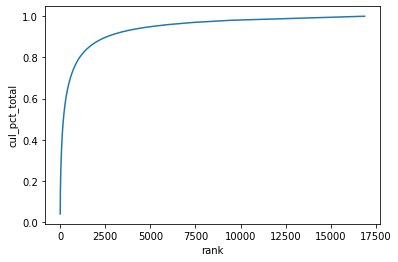

In [349]:
# Lemmas- Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wcLemmas);

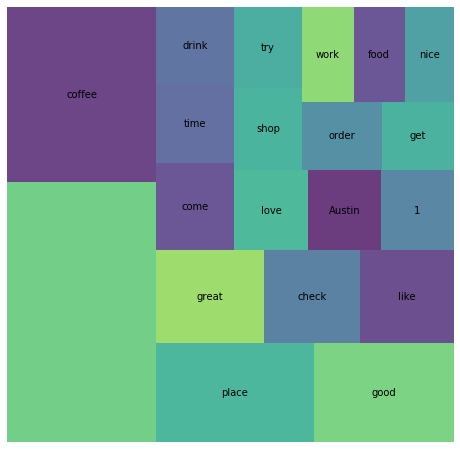

In [350]:
wcLemmas_top20 = wcLemmas[wcLemmas['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcLemmas_top20['pct_total'], label=wcLemmas_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [351]:
#Spacy tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [354]:
# Make them tokens using the Tokenizer Pipe
spacy_tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    spacy_tokens.append(doc_tokens)

shops['spaCy_tokens'] = spacy_tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,lemmas,spaCy_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, check, Love, love, love, atmosphere, corne...","[1, check-in, Love, love, loved, the, atmosphe..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[list, Date, Night, Austin, Ambiance, Austin, ...","[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, check, list, Brunch, Spots, love, eclectic...","[1, check-in, Listed, in, Brunch, Spots, I, lo..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[cool, decor, good, drink, nice, seating, , ...","[Very, cool, decor!, Good, drinks, Nice, seati..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, check, locate, Northcross, mall, shopping,...","[1, check-in, They, are, located, within, the,..."


In [356]:
wcSpacy = count(shops['spaCy_tokens'])
print(wcSpacy.shape)
wcSpacy.head()

(44566, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,the,6520,27779,1.0,0.034993,0.034993,0.856092
55,and,6804,25748,2.0,0.032434,0.067427,0.893382
27,a,6181,22085,3.0,0.027820,0.095247,0.811581
44,I,5469,19780,4.0,0.024916,0.120163,0.718093
75,to,5631,16904,5.0,0.021294,0.141457,0.739364


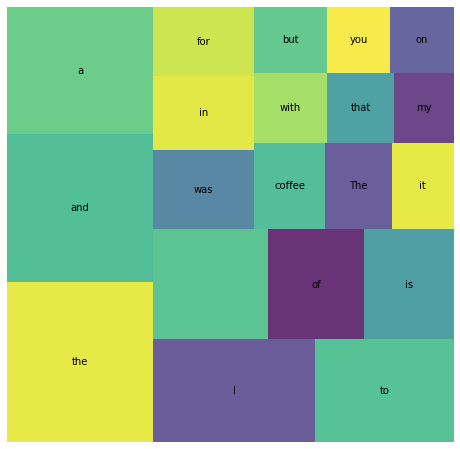

In [357]:
wcSpacy_top20 = wcSpacy[wcSpacy['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcSpacy_top20['pct_total'], label=wcSpacy_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [358]:
#Stop Words
# Spacy's Default Stop Words
#nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [361]:
Stoptokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    Stoptokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = Stoptokens
shops['spaCy_tokens_v2'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: spaCy_tokens_v2, dtype: object

In [362]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,lemmas,spaCy_tokens,spaCy_tokens_v2
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, check, Love, love, love, atmosphere, corne...","[1, check-in, Love, love, loved, the, atmosphe...","[1, check-in, love, love, loved, atmosphere!, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[list, Date, Night, Austin, Ambiance, Austin, ...","[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, check, list, Brunch, Spots, love, eclectic...","[1, check-in, Listed, in, Brunch, Spots, I, lo...","[1, check-in, listed, brunch, spots, loved, ec..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[cool, decor, good, drink, nice, seating, , ...","[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ,..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, check, locate, Northcross, mall, shopping,...","[1, check-in, They, are, located, within, the,...","[1, check-in, located, northcross, mall, shopp..."


In [363]:
wcSpacyv2 = count(shops['spaCy_tokens_v2'])
print(wcSpacyv2.shape)
wcSpacyv2.head()

(38834, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,,4343,14990,1.0,0.036868,0.036868,0.570247
11,coffee,4210,8058,2.0,0.019819,0.056687,0.552784
152,place,3029,4264,3.0,0.010487,0.067174,0.397715
97,great,2438,3250,4.0,0.007993,0.075167,0.320116
248,it's,2061,3117,5.0,0.007666,0.082833,0.270614


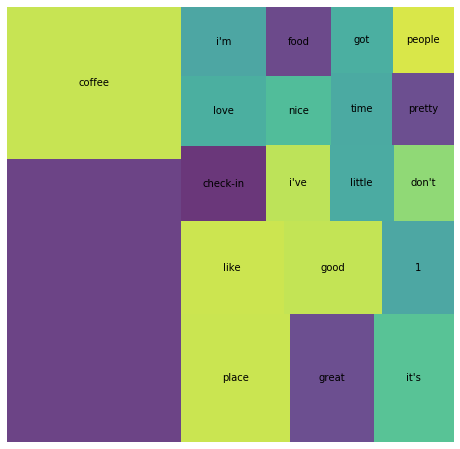

In [364]:
wcSpacyv2_top20 = wcSpacyv2[wcSpacyv2['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcSpacyv2_top20['pct_total'], label=wcSpacyv2_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [365]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','1', 'coffee', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])
STOP_WORDS

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

